In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stock = '^MERV'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2329.800049,2393.600098,2329.800049,2384.500000,2384.500000,0
2010-01-05,2384.899902,2411.399902,2384.899902,2401.800049,2401.800049,0
2010-01-06,2400.399902,2401.100098,2347.300049,2362.500000,2362.500000,0
2010-01-07,2362.500000,2392.800049,2331.899902,2389.500000,2389.500000,0
2010-01-08,2378.100098,2378.100098,2334.699951,2352.800049,2352.800049,0


In [4]:
price = data['Close']
price

Date
2010-01-04      2384.500000
2010-01-05      2401.800049
2010-01-06      2362.500000
2010-01-07      2389.500000
2010-01-08      2352.800049
                  ...      
2023-05-08    304395.906250
2023-05-09    307773.312500
2023-05-10    310497.187500
2023-05-11    313281.406250
2023-05-12    321529.593750
Name: Close, Length: 3241, dtype: float64

<Axes: xlabel='Date'>

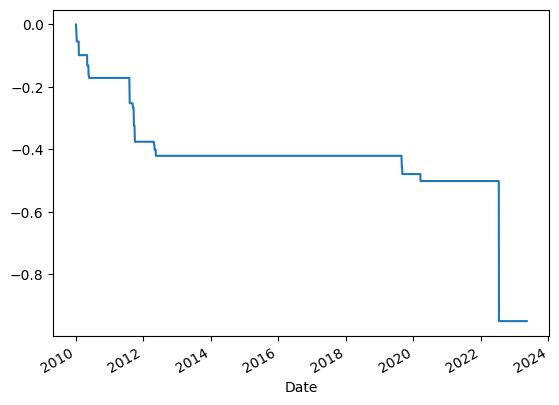

In [5]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [6]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -95.10240897717878 %


In [7]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns


array([ 0.        ,  0.00725521, -0.01636275, ...,  0.00885026,
        0.00896697,  0.02632837])

In [8]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([  1.        ,   1.00725521,   0.99077375, ..., 130.2147987 ,
       131.3824308 , 134.84151552])

In [9]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 13484.15155168786%


In [10]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.301112
2012-12-31    0.159060
2013-12-31    0.888729
2014-12-31    0.591356
2015-12-31    0.360905
2016-12-31    0.449046
2017-12-31    0.771762
2018-12-31    0.010612
2019-12-31    0.375630
2020-12-31    0.229296
2021-12-31    0.630018
2022-12-31    1.420178
2023-12-31    0.591060
Freq: A-DEC, Name: Close, dtype: float64

In [11]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.033586
2010-03-31    0.068560
2010-04-30    0.009521
2010-05-31   -0.080416
                ...   
2023-01-31    0.254662
2023-02-28   -0.024016
2023-03-31   -0.007044
2023-04-30    0.212618
2023-05-31    0.079103
Freq: M, Name: Close, Length: 161, dtype: float64

In [12]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is {avg_yearly_return*100}%")

Average yearly return is 47.51184139878433%


In [13]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 35.008219987909385


In [14]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.033586
2010-05-31   -0.080416
2010-06-30   -0.008441
2010-08-31   -0.023933
2011-02-28   -0.035556
                ...   
2022-02-28   -0.032314
2022-04-30   -0.029778
2022-06-30   -0.041588
2023-02-28   -0.024016
2023-03-31   -0.007044
Name: Close, Length: 65, dtype: float64

In [15]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 59.32423328242082
